# In which I spare you an abundance of "map"-related puns while explaining what Mean Average Precision is. 

(Ok there's one pun.) Since you're reading this I'm assuming you've come up against the slightly convoluted "Mean Average Precision", or MAP metric for evaluating ML algorithms. If you are here on a kaggle quest then you are me two days ago - kaggle is where I first heard about MAP and the reason I typed up this post. 

MAP is very popular evaluation metric for algorithms that do information retrieval (think google search results) but it also can apply to user-targeted product recommendations. **If you have an algorithm that is returning a ranked ordering of items, each item is either hit or miss (imagine relevant vs. irrelevant search results) and items further down in the list are less likely to be used/seen (imagine search results at the bottom of the page), then maybe MAP is the metric for you!** 

# MAP for Recommender Algorithms
MAP is a pretty common metric for user recommendation systems, like when Amazon shows you a short list of products it thinks you might *also* want to purchase after you've added something to your cart. **Using MAP to evaluate a recommender algorithm implies that you are treating the recommendation like a ranking task.** This often makes perfect sense! A user has a finite amount of time and attention, so we want to know not just five products they might like, but also which are most liked or which we are most confident of. This lets you show the top recommendations first and maybe market them more aggressively.

So we just want a metric that rewards you for getting lots of "correct" or relevant recommendations, and rewards you for having them earlier on in the list (higher ranked). Before we can construct this metric though, we need **Precision** and **Recall**. That's what I call my left and right fist. Only joking, those are actually two things I conveniently just learned about in Andrew Ng's ML course on Coursera!

# Precision and Recall of a Binary Classifier
So let's start where professor Ng started. If we have binary classifier for predicting having a condition ($y=1$) vs not, then we define:


\begin{align*}
\textrm{precision:} \qquad P = \frac{\textrm{# correct positive}}{\textrm{# predicted positive}}\\
\\
\textrm{recall:} \qquad r  = \frac{\textrm{# correct positive}}{\textrm{# with condition}}
\end{align*}


In maybe more familiar terminology, precision is (1 -  *false positive rate*), and the recall is (1 - *false negative rate*). Actually I'm baffled as to why two new terms were needed for this. 

It might also be helpful to some people to think in terms of conditional probabilities: $P = \textrm{P}(y=1\  \big|\  h_\theta(x)=1)$ and $r =  \textrm{P}(h_\theta(x)=1 \ \big| \  y=1)$, where $h_\theta(x)$ is the prediction output of your algorithm for data point $x$. (IF THAT WAS CONFUSING JUST PRETEND YOU DIDN'T HEAR IT.)

# Precision and Recall of Recommender Systems
OK so how does this map (ding!) to recommender systems? In modeling pretty much all recommendation systems we're going to have the following quantities with their corresponding ones in the binary classifier:

|  Terminology in Binary Classifier  |  Terminology in Recommender System  |
|------|------|
| # with condition |  the number of all the actually relevant ("correct") items for a user| 
| # predicted positive | the number of items we selected to recommend to a user (we predicted these as "relevant")   |
| # correct positives | the number of items that are actually relevant from among those that we selected to recommend |

OK so now with almost no effort we have:


\begin{align*}
\textrm{recommender system precision:} \qquad P = \frac{\textrm{# of our recommendations that are relevant}}{\textrm{# of items we recommended}}\\
\\
\textrm{recommender system recall:} \qquad r  = \frac{\textrm{# of our recommendations that are relevant}}{\textrm{# of all the possible relevant items}}
\end{align*}


Let's say I am asked to recommend $N=5$ products (this means I predict "positve" for five prducts), from all the possible products there are only $m=3$ that are actually relevant to the user, and my successes and failures in my ranked list are $[0, 1, 1, 0, 0]$. Then:
- \# of items we recommended = 5
- \# of our recommendations that are relevant = 2
- \# of all the possible relevant items = 3
- precision = 2/5
- recall = 2/3


People love examples, so here's a visual one. Let's say we're being asked to recommend financial "products" to Bank users and we compare our recommendations to the products that a user actually added in the following month (these are all the possible "relevant" ones).

<img src="images/map/area_pic.png" width=800></img>

## Precision and Recall at Cutoff k
So that's nice and all, BUT Precision and Recall don't give a crap about ordering of our recommendations. So instead let's talk about **precision and recall at cutoff k**. Imagine taking your list of $N$ recommendations and considering only the first element, then only the first two, then only the first three, etc... these subsets can be indexed by $k$. **Precision at cutoff k, $P(k)$, and Recall at cutoff k, $r(k)$, are simply the precision and recall calculated by considering only the subset of your recommendations from rank 1 through $k$**. Really it would be more intuitive to say "up to cutoff k" rather than "at".

Sticking with the bank example, here is what I mean:
<img src="images/map/subset_pic.png" width=800></img>

# Average Precision
OK are you ready for Average Precision now? If we are asked to recommend $N$ items, the number of relevant items in the full space of items is $m$, then:

\begin{align*}
\textrm{AP@N} = \frac{1}{m}\sum_{k=1}^N \textrm{($P(k)$ if $k^{th}$ item was relevant)} = \frac{1}{m}\sum_{k=1}^N P(k)\cdot rel(k),
\end{align*}

where $rel(k)$ is just an indicator that says whether that $k^{th}$ item was relevant ($rel(k)=1$) or not ($rel(k)=0$). I'd like to point out that instead of recommending $N$ items would could have recommended, say, $2N$, but the AP@N metric says we only care about the average precision up to the $N^{th}$ item. 

# Examples and Intuition for AP
Let's imagine recommending $N=3$ products (AP@3) to a user who actually added a total of $m=3$ products. Here are some examples of outcomes:

|  ________Recommendations________ |  ________Precision @k's________  | ________AP@3________ |
|----------------------|----------------------|----------------------|
|  [1, 0, 0]  |  [1/1, 1/2, 1/3]  |   (1/3)(1) = 1/3  |
|  [0, 1, 0]  |  [0, 1/2, 1/3]  |  (1/3)(1/2) = 1/6|
|  [0, 0, 1]  |  [0, 0, 1/3]  |  (1/3)(1/3) = 1/9 |

Notice that in all the rows you got just one recommendations correct, but when it was your first recommendation you got the largest AP. Having your one correct recommendation as the second element was half as good as having it as the first and one third as good when you instead have it as the third element. How about some more examples to illustrate this subtlety.

|  ________Recommendations________|  ________Precision @k's________  | ________AP@3________  |
|------|------||------|------||------|
|  [0, 0, 1]  |  [0, 0, 1/3]  |  (1/3)**(1/3)** = 1/9  |
|  [0, 1, 1]  |  [0, 1/2, 2/3]  |  (1/3)[(1/2) + **(2/3)**] = 7/18  |
|  [1, 1, 1]  |  [1/1, 2/2, 3/3]   |  (1/3)[(1) + (2/2) + **(3/3)**] = 1 |

Notice that starting from the first row where only the third recommendation is correct, when I add in a second and third correct element I get an increasing AP. This is because the $k^{th}$ subset precision is included in AP sum only if you got the $k^{th}$ recommendation correct, thus **AP rewards you for giving correct recommendations** (surprising absolutely no one). 

Now the third row of the table - here we're getting everything right so each element is adding the same $P(k)=1$ to the precision. Now look at the last column of the table, in each row I've bolded the term which came from the correct recommendation in the third slot. Notice it is bigger when there have been more successes in front of it - that's because your precision for the $k^{th}$ subset is larger the better you've done up to $k$. Thus, **AP rewards you for front-loading the recommendations that are most likely to be correct**. 

These two features are what makes AP a useful metric when your algorithm is returning a ranked ordering of items, each item is either hit or miss, and items further down in the list are less likely to be used/seen. A final point of note is that adding another recommendation can never *decrease* your AP score, so if you are asked for $N$ recommendations give all of them, even if you don't feel very confident about the ones lower down the list! **AP will never penalize you for tacking on additional recommendations to your list - just make sure you front-load the best ones.**

# The "Mean" in MAP
OK that was Average Precision, which applies to a single data point (like a single user). What about MAP@N? All that remains is to average the AP@N metric over all your $|U|$ users. Yes, an average of an average.

\begin{align*}
\textrm{MAP@N} = \frac{1}{|U|}\sum_{u=1}^|U|(\textrm{AP@N})_u = \frac{1}{|U|} \sum_{u=1}^|U| \frac{1}{m}\sum_{k=1}^N P_u(k)\cdot rel_u(k).
\end{align*}

## Minor Details
Often you see the AP metric modified slightly when there might be more possible correct recommendations then the number of recommendations you are asked to give. Say, a super active user at the bank who adds $m=10$ accounts the next month, while your algorithm is only supposed to report $N=5$. In this case the normalization factor used is $1/\textrm{min}(m, N)$, which prevents your AP score from being unfairly suppressed when your number of recommendations couldn't possibly capture all the correct ones. 

\begin{align*}
\textrm{AP@N} = \frac{1}{\textrm{min}(m,N)}\sum_{k=1}^N P(k)\cdot rel(k).
\end{align*}

You also might encounter a somewhat sloppier usage where there is no indicator function $rel(k)$ in the AP@N sum. In this case the person is re-defining the precision at cutoff $k$ to be zero when the $k^{th}$ recommendation was incorrect, that way it still doesn't contribute to the sum:

\begin{align*}
\textrm{AP@N} = \frac{1}{m}\sum_{k=1}^N P(k),\\
P(k) = 0 \textrm{ if $k^{th}$ element is irrelevant / incorrect.}
\end{align*}

Finally, the if it's possible for there to be no relevant or correct recommendations possible ($m=0$) then often the AP is defined to be zero for those points. This is just to prevent us from trying to divide by zero in the normalization. Note that it will have the effect of dragging the MAP number of an algorithm down the more users there are who didn't actually add any products. This doesn't matter for comparing the performance of two algorithms on the same data set, but it does mean that you shouldn't place any kind of absolute meaning on the final number.

\begin{align*}
\textrm{AP@N} = \frac{1}{\textrm{min}(m,N)}\sum_{k=1}^N P(k)\cdot rel(k) \qquad \textrm{ if $m\neq 0$,}\\
AP = 0 \qquad \textrm{if $m=0$}.
\end{align*}


# So Why Did I Bother Defining Recall?
There is an alternative formulation for the AP in terms of Precision *and* Recall, and I didn't want you to feel left out when people start talking about it at parties:

\begin{align*}
\textrm{AP@N} = \sum_{k=1}^N \textrm{(precision at $k$)}\cdot\textrm{(change in recall at $k$)} = \sum_{k=1}^N P(k)\Delta r(k),
\end{align*}

where $\Delta r(k)$ is the change in recall from the $k-1^{th}$ to the $k^{th}$ subset. This formulation is actually kind of nice because we don't need to "leave out" terms in the sum with an indicator function, instead the change in recall term is zero when the $k^{th}$ recommendation is incorrect so those guys get wiped out anyway. Hopefully you noticed that the prefactor $1/m$ is missing too, it turns out that when the $k^{th}$ recommendation *is* correct the change in recall is exactly $1/m$.  OK let me stop talking and make with the examples. Same as before, recommending $N=3$ products (AP@3) to a user who actually added a total of $m=3$ products:

|  ________Recs________  |  ________Prec @k's________ |  ________Recall @k's________  |  ________Change r @k's________  |  ________AP@3________  |
|------|------|
|  [1, 0, 0]  |  [1, 1/2, 1/3]  | [1/3, 1/3, 1/3]  |  [1/3, 0, 0]  |  (1)(1/3) = 1/3 |
|  [0, 1, 0]  |  [0, 1/2, 1/3]  | [0, 1/3, 1/3]  |  [0, 1/3, 0]  |  (1/2)(1/3) = 1/6|
|  [0, 0, 1]  |  [0, 0, 1/3]  | [0, 0, 1/3]  |  [0, 0, 1/3]  |  (1/3)(1/3) = 1/9 |


|  ________Recs________  |  ________Prec @k's________ |  ________Recall @k's________  |  ________Change r @k's________  |  ________AP@3________  |
|------|------|
|  [0, 0, 1]  |  [0, 0, 1/3]  | [0, 0, 1/3]  |  [0, 0, 1/3]  |  **(1/3)(1/3)** = 1/12  |
|  [0, 1, 1]  |  [0, 1/2, 2/3]  | [0, 1/3, 2/3]  |  [0, 1/3, 1/3]  |  (1/3)(1/2) + **(1/3)(2/3)** = 7/18  |
|  [1, 1, 1]  |  [1, 2/2, 3/3]  | [1/3, 2/3, 3/3]  |  [1/3, 1/3, 1/3]  |  (1/3)(1) + (1/3)(1) + **(1/3)(1)** = 3/4 |

Hopefully you can convince yourself that you are getting exactly the same result for this formulation of AP as we got before.

## Graphical Representation of $P(i)$ and $r(i)$
We can think of $P(i)$ and $r(i)$ as functions of the index $i$, and we can plot them accordingly, e.g. $P(i)$ vs. $i$. The resulting plot would of course depend heavily on the particular sequence of correct/incorrect recommendations that we are indexing through. More often what you see is a plot in the $P(i)$ x $r(i)$ plane that traces out the trajectory of both these quantities as you index through the list of recommendations. Analytically we can already imagine what such a trajectory will do: if at the next $i$ we got a correct recommendation then both precision and recall should increase, whereas if we got that recommendation wrong then precision will decrease while recall will be unchanged. 

Let me show you :)

In [9]:
recoms = [0, 1, 0, 1, 0, 1, 1]  # N = 7
NUM_ACTUAL_ADDED_ACCT = 5 
precs = []
recalls = []

for indx, rec in enumerate(recoms):
    precs.append(sum(recoms[:indx+1])/(indx+1))
    recalls.append(sum(recoms[:indx+1])/NUM_ACTUAL_ADDED_ACCT)

print(precs)
print(recalls)

[0.0, 0.5, 0.3333333333333333, 0.5, 0.4, 0.5, 0.5714285714285714]
[0.0, 0.2, 0.2, 0.4, 0.4, 0.6, 0.8]


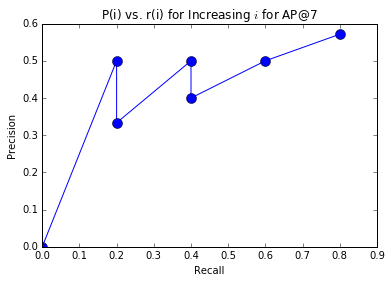

In [10]:
import matplotlib.pyplot as plt
% matplotlib inline
fig, ax = plt.subplots()
ax.plot(recalls, precs, markersize=10, marker="o")
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
ax.set_title("P(i) vs. r(i) for Increasing $i$ for AP@7")

The jaggedness of this type of plot has lead to the creation of some "smoothed" average precision metrics as alternatives, but I'll not talk about them here. 

# To Summarize...
MAP is very popular evaluation metric for algorithms that do information retrieval (think google search results) but it also can apply to user-targeted product recommendations. If you have an algorithm that is returning a ranked ordering of items, each item is either hit or miss (imagine relevant vs. irrelevant search results) and items further down in the list are less likely to be used/seen (imagine search results at the bottom of the page), then MAP might be a useful metric. Using MAP to evaluate a recommender algorithm implies that you are treating the recommendation like a ranking task. This often makes perfect sense since a user has a finite amount of time and attention and we want to show the top recommendations first and maybe market them more aggressively. 

In recommendation systems MAP computes the mean of the Average Precision (AP) over all your users. The Average Precision is a measure that takes in a ranked list of your $N$ recommendations and compares it to a list of the true set of relevant recommendations for that user. AP rewards you for having a lot of "correct" (relevant) recommendations in your list, and rewards you for putting the most likely correct recommendations at the top (you are penalized more when incorrect guesses are higher up in the ranking). So order of "hits" and "misses" matters a lot in computing an AP score, but once you have front-loaded your best guesses you can never *decrease* your AP by tacking on more. 

# Further Reading on MAP
- from the source itself... [wikipedia](https://en.wikipedia.org/wiki/Information_retrieval#Average_precision)
- from an all-things-ML blog [fast ML](http://fastml.com/what-you-wanted-to-know-about-mean-average-precision/)
- from [Stanford class slides](http://web.stanford.edu/class/cs276/handouts/EvaluationNew-handout-6-per.pdf) 
- from a [DS blog](https://sanchom.wordpress.com/tag/average-precision/)
- from a [Stanford online book](http://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-ranked-retrieval-results-1.html)
- from June Andrews on why [MAP is "mean"](https://juneandrews.com/2014/12/15/mean-average-precision-isnt-so-nice/)
- from [Cornell class slides](http://www.cs.cornell.edu/courses/cs4300/2013fa/lectures/metrics-2-4pp.pdf)